# **Exploring Crime Patterns in New York City: An Analysis of NYPD Complaint and Arrest Data**

## **Data Collection**

### **Data from Source 1: NYPD Complaint data** 
NYPD Complaint Historic data consists of all valid felony, misdemeanour, and violation crimes reported to the New York City Police Department (NYPD) from 2006 to the end of last year (2019).

Accessing the API and using the requests module to get the data

In [1]:
import requests
import json
import random

# Define the base URL for the API endpoint
base_url = "https://data.cityofnewyork.us/resource/qgea-i56i.json"

# Maximum number of records to retrieve
limit = 20000
random.seed(42)
# Set a random offset
offset = random.randint(0, 8359721)  

# URL with the limit and offset parameters
url = f"{base_url}?$limit={limit}&$offset={offset}"

# Send GET request and get response
response = requests.get(url)

# Check for successful response
if response.status_code == 200:
    # Parse JSON data
    complaint_data = json.loads(response.text)
    
    # Print the total number of retrieved records
    print("Total number of records retrieved:", len(complaint_data))
    
else:
    print("Error:", response.status_code)


Total number of records retrieved: 20000


### **Data from Source 2: NYPD Arrest data** 
NYPD Arrest Data consists of every arrest effected in NYC by the NYPD during the current year. This data is manually extracted every quarter and reviewed by the Office of Management Analysis and Planning. Each record represents an arrest effected in NYC by the NYPD and includes information about the type of crime, the location and time of enforcement.

The data is in a csv format. Using pandas to read the data into a pandas dataframe.

In [2]:
import pandas as pd

filename = 'Data Sources\\NYPD_Arrests_Data__Historic_.csv'

# Read the CSV file into a pandas DataFrame
arrest_data = pd.read_csv(filename)
random.seed(42)
arrest_data = arrest_data.sample(n=20000)

## **Data Exploration**

Understanding the type of "complaint_data"

In [3]:
type(complaint_data)

list

complaint_data is a list of JSONs

Displaying the first few entries of the complaint data

In [4]:
# Print the first few entries of the complaint data
for i in range(5):
    print(complaint_data[i])


{'cmplnt_num': '82590349', 'cmplnt_fr_dt': '2012-01-10T00:00:00.000', 'cmplnt_fr_tm': '21:00:00', 'cmplnt_to_dt': '2012-01-11T00:00:00.000', 'cmplnt_to_tm': '08:00:00', 'addr_pct_cd': '61', 'rpt_dt': '2012-01-11T00:00:00.000', 'ky_cd': '341', 'ofns_desc': 'PETIT LARCENY', 'pd_cd': '321', 'pd_desc': 'LARCENY,PETIT FROM AUTO', 'crm_atpt_cptd_cd': 'COMPLETED', 'law_cat_cd': 'MISDEMEANOR', 'boro_nm': 'BROOKLYN', 'loc_of_occur_desc': 'INSIDE', 'prem_typ_desc': 'RESIDENCE-HOUSE', 'juris_desc': 'N.Y. POLICE DEPT', 'jurisdiction_code': '0', 'parks_nm': '(null)', 'hadevelopt': '(null)', 'housing_psa': '(null)', 'x_coord_cd': '1001742', 'y_coord_cd': '159585', 'susp_age_group': '(null)', 'susp_race': '(null)', 'susp_sex': '(null)', 'latitude': '40.604686', 'longitude': '-73.937005', 'lat_lon': {'latitude': '40.604686', 'longitude': '-73.937005'}, 'patrol_boro': 'PATROL BORO BKLYN SOUTH', 'station_name': '(null)', 'vic_age_group': '25-44', 'vic_race': 'WHITE', 'vic_sex': 'F', ':@computed_region_e

Understanding the type of "arrest_data"

In [5]:
type(arrest_data)

pandas.core.frame.DataFrame

arrest_data is a pandas dataframe

Displaying the first few entries of the arrest data

In [6]:
# Display the first few rows of the arrest data DataFrame
arrest_data.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
5414240,248100335,07/16/2022,419.0,"LARCENY,GRAND FROM PERSON,UNCL",109.0,GRAND LARCENY,PL 1553005,F,S,121,0.0,25-44,F,WHITE,946783.0,170902.0,40.635685,-74.134992,POINT (-74.134992 40.635685)
3302538,79899969,07/20/2011,490.0,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY 5,PL 1654000,M,K,84,0.0,25-44,F,BLACK,988175.0,190975.0,40.690866,-73.985848,POINT (-73.98584805699994 40.69086637500004)
1236625,162922306,03/18/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,M,14,1.0,18-24,F,BLACK,987078.0,215157.0,40.757241,-73.989794,POINT (-73.98979363699993 40.757240531000036)
262394,204998580,11/11/2019,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601002,F,Q,103,0.0,25-44,M,BLACK,1041879.0,197084.0,40.707447,-73.792142,POINT (-73.79214176799998 40.707447364000075)
4924940,33944494,08/23/2007,106.0,"ASSAULT 2,1,PEACE OFFICER",106.0,FELONY ASSAULT,PL 1201100,F,Q,112,0.0,25-44,M,WHITE,1025453.0,202565.0,40.722583,-73.851354,POINT (-73.85135435199999 40.72258311500008)


Since complaint_data is a list of JSONs we can covert it into a pandas dataframe to make use of it better

In [7]:
# Convert the list to a DataFrame
complaint_data_df = pd.DataFrame(complaint_data)

In [8]:
complaint_data_df.shape

(20000, 40)

There are 20000 rows and 40 columns in complaint_data_df dataframe

In [26]:
complaint_data_df.describe()


,ky_cd,pd_cd
count,20000.000000,20000.000000
mean,288.458400,414.188900
std,143.679029,215.912685
min,101.000000,101.000000
25%,117.000000,254.000000
50%,341.000000,388.000000
75%,351.000000,637.000000
max,678.000000,922.000000


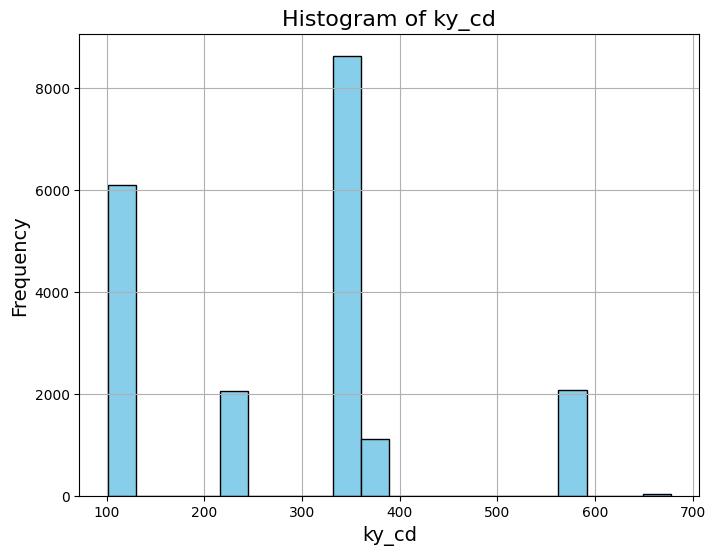

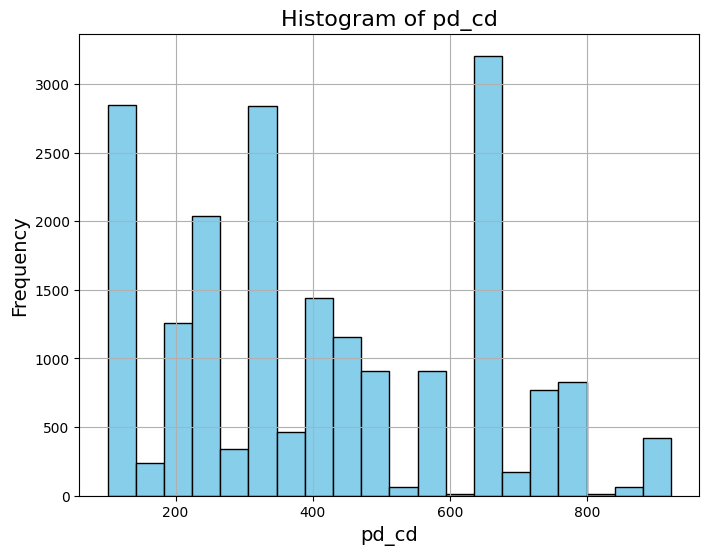

In [27]:
import matplotlib.pyplot as plt

# Selecting numeric columns
numeric_cols = complaint_data_df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(complaint_data_df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True)
    plt.show()


Displaying the summary statistics of the numeric columns present in the complaint_data_df dataframe

Displaying the columns of complaint_data and arrest_data

In [10]:
# Print the columns of complaint data
print(complaint_data_df.columns)

# Print the fcolumns of arrest dadta
print(arrest_data.columns)

Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt',
       'cmplnt_to_tm', 'addr_pct_cd', 'rpt_dt', 'ky_cd', 'ofns_desc', 'pd_cd',
       'pd_desc', 'crm_atpt_cptd_cd', 'law_cat_cd', 'boro_nm',
       'loc_of_occur_desc', 'prem_typ_desc', 'juris_desc', 'jurisdiction_code',
       'parks_nm', 'hadevelopt', 'housing_psa', 'x_coord_cd', 'y_coord_cd',
       'susp_age_group', 'susp_race', 'susp_sex', 'latitude', 'longitude',
       'lat_lon', 'patrol_boro', 'station_name', 'vic_age_group', 'vic_race',
       'vic_sex', ':@computed_region_efsh_h5xi', ':@computed_region_f5dn_yrer',
       ':@computed_region_yeji_bk3q', ':@computed_region_92fq_4b7q',
       ':@computed_region_sbqj_enih', 'transit_district'],
      dtype='object')
Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Lat

### Common Data Points between NYPD Complaint Data and NYPD Arrest Data:

1. **Crime Type:** `ky_cd`

2. **Location:** `addr_pct_cd`

3. **Date/Time:**  `cmplnt_fr_dt` and `cmplnt_fr_tm` and `ARREST_DATE`

4. **Jurisdiction:** `jurisdiction_code`
   

5. **Geographic Coordinates:** `latitude` and `longitude`
 



## **Data Cleaning**

Checking for null or NA values in the dataframes

In [11]:
# Check for missing values
missing_values = complaint_data_df.isnull().sum()
print("Missing Values in complaint_data_df:")
print(missing_values)

Missing Values in complaint_data_df:
cmplnt_num                         0
cmplnt_fr_dt                       2
cmplnt_fr_tm                       0
cmplnt_to_dt                    5377
cmplnt_to_tm                       0
addr_pct_cd                        1
rpt_dt                             0
ky_cd                              0
ofns_desc                          0
pd_cd                             17
pd_desc                            0
crm_atpt_cptd_cd                   0
law_cat_cd                         0
boro_nm                            0
loc_of_occur_desc                  0
prem_typ_desc                      0
juris_desc                         0
jurisdiction_code                  0
parks_nm                           0
hadevelopt                         0
housing_psa                        0
x_coord_cd                         0
y_coord_cd                         0
susp_age_group                     0
susp_race                          0
susp_sex                           0
l

There are Na values in some of the columns. Imputing them accordingly.

In [12]:
# Check for missing values
missing_values = complaint_data_df.isnull().sum()
print("Missing Values in complaint_data_df:")
print(missing_values)

# Impute missing values for date columns with the most frequent date
date_cols = ['cmplnt_fr_dt', 'cmplnt_to_dt']  # List of date columns
for col in date_cols:
    mode_value = complaint_data_df[col].mode()[0]  # Find the most frequent date
    complaint_data_df = complaint_data_df.fillna({col: mode_value})  # Fill missing values with mode

# Convert 'pd_cd' column to numeric, coerce errors to NaN
complaint_data_df['pd_cd'] = pd.to_numeric(complaint_data_df['pd_cd'], errors='coerce')

# Impute missing values for numerical columns with median
numeric_cols = ['pd_cd']
for col in numeric_cols:
    median_value = complaint_data_df[col].median()
    complaint_data_df = complaint_data_df.fillna({col: median_value})

# Impute missing values for categorical columns with mode
categorical_cols = ['addr_pct_cd','transit_district','pd_cd']
for col in categorical_cols:
    mode_value = complaint_data_df[col].mode()[0]
    complaint_data_df = complaint_data_df.fillna({col: mode_value})

# Verify if there are no missing values after imputation
missing_values_after_imputation = complaint_data_df.isnull().sum()
print("Missing Values after Imputation:")
print(missing_values_after_imputation)


Missing Values in complaint_data_df:
cmplnt_num                         0
cmplnt_fr_dt                       2
cmplnt_fr_tm                       0
cmplnt_to_dt                    5377
cmplnt_to_tm                       0
addr_pct_cd                        1
rpt_dt                             0
ky_cd                              0
ofns_desc                          0
pd_cd                             17
pd_desc                            0
crm_atpt_cptd_cd                   0
law_cat_cd                         0
boro_nm                            0
loc_of_occur_desc                  0
prem_typ_desc                      0
juris_desc                         0
jurisdiction_code                  0
parks_nm                           0
hadevelopt                         0
housing_psa                        0
x_coord_cd                         0
y_coord_cd                         0
susp_age_group                     0
susp_race                          0
susp_sex                           0
l

In [13]:
# Check for missing values
missing_values = complaint_data_df.isnull().sum()
print("Missing Values in complaint_data_df:")
print(missing_values)

Missing Values in complaint_data_df:
cmplnt_num                      0
cmplnt_fr_dt                    0
cmplnt_fr_tm                    0
cmplnt_to_dt                    0
cmplnt_to_tm                    0
addr_pct_cd                     0
rpt_dt                          0
ky_cd                           0
ofns_desc                       0
pd_cd                           0
pd_desc                         0
crm_atpt_cptd_cd                0
law_cat_cd                      0
boro_nm                         0
loc_of_occur_desc               0
prem_typ_desc                   0
juris_desc                      0
jurisdiction_code               0
parks_nm                        0
hadevelopt                      0
housing_psa                     0
x_coord_cd                      0
y_coord_cd                      0
susp_age_group                  0
susp_race                       0
susp_sex                        0
latitude                        0
longitude                       0
lat_lon    

Cleaning the arrest_data dataframe in the same way

In [14]:
# Check for missing values
missing_values = arrest_data.isnull().sum()
print("Missing Values in complaint_data_df:")
print(missing_values)

Missing Values in complaint_data_df:
ARREST_KEY            0
ARREST_DATE           0
PD_CD                 3
PD_DESC              40
KY_CD                41
OFNS_DESC            40
LAW_CODE              1
LAW_CAT_CD           98
ARREST_BORO           0
ARREST_PRECINCT       0
JURISDICTION_CODE     0
AGE_GROUP             0
PERP_SEX              0
PERP_RACE             0
X_COORD_CD            0
Y_COORD_CD            0
Latitude              0
Longitude             0
Lon_Lat               0
dtype: int64


In [15]:

# Impute missing values for numeric columns with median
numeric_cols = ['PD_CD', 'KY_CD', 'X_COORD_CD', 'Y_COORD_CD']
for col in numeric_cols:
    median_value = arrest_data[col].median()
    arrest_data[col] = arrest_data[col].fillna(median_value)

# Impute missing values for categorical columns with mode
categorical_cols = ['PD_DESC', 'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD', 'AGE_GROUP']
for col in categorical_cols:
    mode_value = arrest_data[col].mode()[0]
    arrest_data[col] = arrest_data[col].fillna(mode_value)

# Verify if there are no missing values after imputation
missing_values_after_imputation = arrest_data.isnull().sum()
print("Missing Values after Imputation:")
print(missing_values_after_imputation)


Missing Values after Imputation:
ARREST_KEY           0
ARREST_DATE          0
PD_CD                0
PD_DESC              0
KY_CD                0
OFNS_DESC            0
LAW_CODE             0
LAW_CAT_CD           0
ARREST_BORO          0
ARREST_PRECINCT      0
JURISDICTION_CODE    0
AGE_GROUP            0
PERP_SEX             0
PERP_RACE            0
X_COORD_CD           0
Y_COORD_CD           0
Latitude             0
Longitude            0
Lon_Lat              0
dtype: int64


In [16]:
import numpy as np

# Replace '(null)' with NaN in 'cmplnt_to_tm' column
complaint_data_df['cmplnt_to_tm'] = complaint_data_df['cmplnt_to_tm'].replace('(null)', np.nan)

# Convert time columns to datetime objects
complaint_data_df['cmplnt_fr_tm'] = pd.to_datetime(complaint_data_df['cmplnt_fr_tm'], format='%H:%M:%S', errors='coerce').dt.time
complaint_data_df['cmplnt_to_tm'] = pd.to_datetime(complaint_data_df['cmplnt_to_tm'], format='%H:%M:%S', errors='coerce').dt.time

# Convert 'ARREST_DATE' column to datetime object
arrest_data['ARREST_DATE'] = pd.to_datetime(arrest_data['ARREST_DATE'])


In [17]:
print(arrest_data.columns)
print(complaint_data_df.columns)

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat'],
      dtype='object')
Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt',
       'cmplnt_to_tm', 'addr_pct_cd', 'rpt_dt', 'ky_cd', 'ofns_desc', 'pd_cd',
       'pd_desc', 'crm_atpt_cptd_cd', 'law_cat_cd', 'boro_nm',
       'loc_of_occur_desc', 'prem_typ_desc', 'juris_desc', 'jurisdiction_code',
       'parks_nm', 'hadevelopt', 'housing_psa', 'x_coord_cd', 'y_coord_cd',
       'susp_age_group', 'susp_race', 'susp_sex', 'latitude', 'longitude',
       'lat_lon', 'patrol_boro', 'station_name', 'vic_age_group', 'vic_race',
       'vic_sex', ':@computed_region_efsh_h5xi', ':@computed_region_f5dn_yrer',
       ':@computed_region_yeji_bk3q', ':@computed_region_92fq_4b7q',
       ':@computed_region_

Converting the column names of arrest_data to lowercase to maintain the a proper format across the data

In [18]:
# Convert column names to lowercase
arrest_data.columns = arrest_data.columns.str.lower()

Cleaned and formatted both of the data frames obtained from two data sources

## **Merging the Data**

We can use the pd_cd column which is Three digit internal classification code and ky_cd column which is Three digit offense classification code as the common points of both the dataframes to merge the data

Before that, converting them into the same datatype (float)

In [19]:
complaint_data_df['pd_cd'] = complaint_data_df['pd_cd'].astype(float)
complaint_data_df['ky_cd'] = complaint_data_df['ky_cd'].astype(float)

In [20]:
merged_data = pd.merge(arrest_data, complaint_data_df, 
                       left_on=['pd_cd', 'ky_cd'], 
                       right_on=['pd_cd', 'ky_cd'], 
                       how='inner')

Successfully merged both the data sources into a single dataframe named "merged_data"

## **Analysis of the data**

### **Analysis of Top 10 Most Frequent Crime Complaints**

Analysis of crime types in complaint data and creating a horizontal bar plot to show the top 10 most frequent crimes.

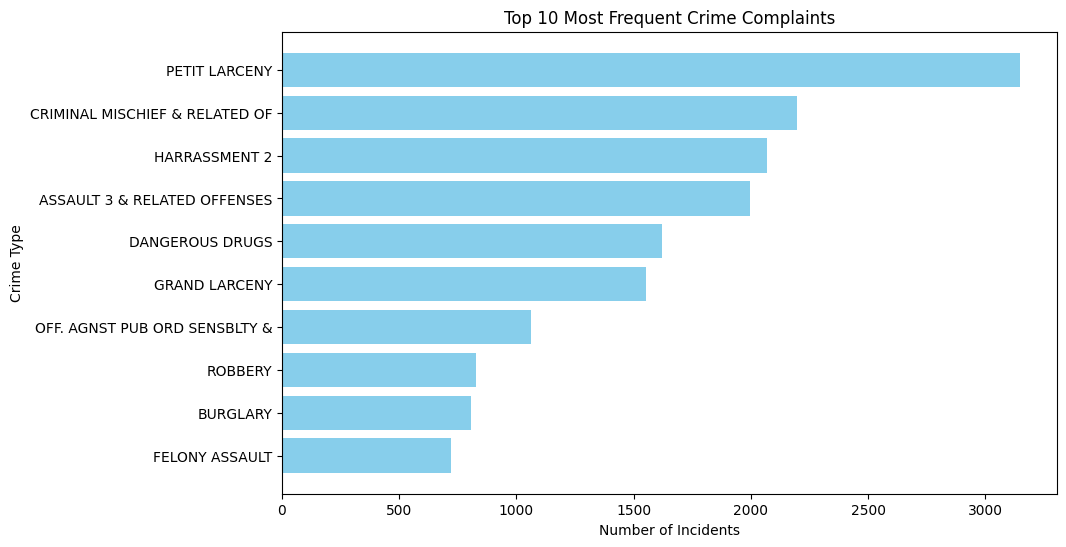

In [21]:
def analyze_crime_types(complaint_data, output_file):
    # Initialize a dictionary to store crime type counts
    crime_counts = {}
    for complaint in complaint_data:
        crime_type = complaint['ofns_desc']
        # Increment count for the current crime type
        if crime_type in crime_counts:
            crime_counts[crime_type] += 1
        else:
            crime_counts[crime_type] = 1

    # Sort the dictionary by count (descending order)
    sorted_crimes = sorted(crime_counts.items(), key=lambda x: x[1], reverse=True)

    # Extract top 10 most frequent crimes and their counts
    top_crimes = [crime[0] for crime in sorted_crimes[:10]]
    top_counts = [crime[1] for crime in sorted_crimes[:10]]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(top_crimes, top_counts, color='skyblue')
    plt.xlabel('Number of Incidents')
    plt.ylabel('Crime Type')
    plt.title('Top 10 Most Frequent Crime Complaints')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
    plt.show()  # Display the plot
    
    # Write the top 10 most frequent crime complaints to a CSV file
    with open(output_file + '_data.csv', 'w', newline='') as csvfile:
        fieldnames = ['Crime Type', 'Count']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for i, (crime, count) in enumerate(sorted_crimes[:10], start=1):
            writer.writerow({'Crime Type': crime, 'Count': count})

# Specify the output file path
output_file = 'top_10_crime_complaints'

# Analyze crime types in your complaint data, plot the visualization, and save the data to a CSV file
analyze_crime_types(complaint_data, output_file)


Larceny, Harassment and Assault are leading in the most frequent complaints received

### **Analysis of Top 10 Most Frequent Crime Arrests**

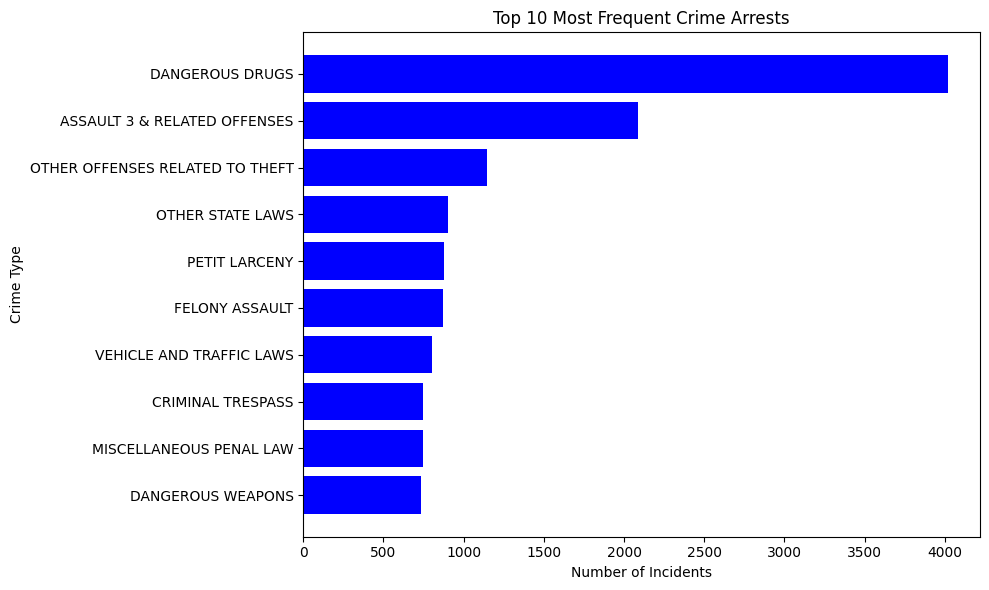

In [22]:
def analyze_crime_types(arrest_data, output_file):

  # Count occurrences of each crime type
  crime_counts = arrest_data['ofns_desc'].value_counts().reset_index(name='count')

  # Sort crimes by count (descending order) and select top 10
  top_10_crimes = crime_counts.sort_values(by='count', ascending=False).head(10)

  # Extract crime types and counts for plotting
  top_crime_types = list(top_10_crimes['ofns_desc'])
  top_crime_counts = list(top_10_crimes['count'])

  # Plotting
  plt.figure(figsize=(10, 6))
  plt.barh(top_crime_types, top_crime_counts, color='blue')
  plt.xlabel('Number of Incidents')
  plt.ylabel('Crime Type')
  plt.title('Top 10 Most Frequent Crime Arrests')
  plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
  plt.tight_layout()
  plt.show()

  # Write top 10 crimes and counts to CSV
  top_10_crimes.to_csv(f'{output_file}_data.csv', index=False)

# Replace 'arrest_data' with your actual arrest data (pandas DataFrame)
analyze_crime_types(arrest_data, 'top_10_crime_arrests')


Dangerous drug use category consists of the highest arrest numbers followed by tresspassing.

### **Demographic Analysis: Age and Racial Distribution in Arrests and Complaints**

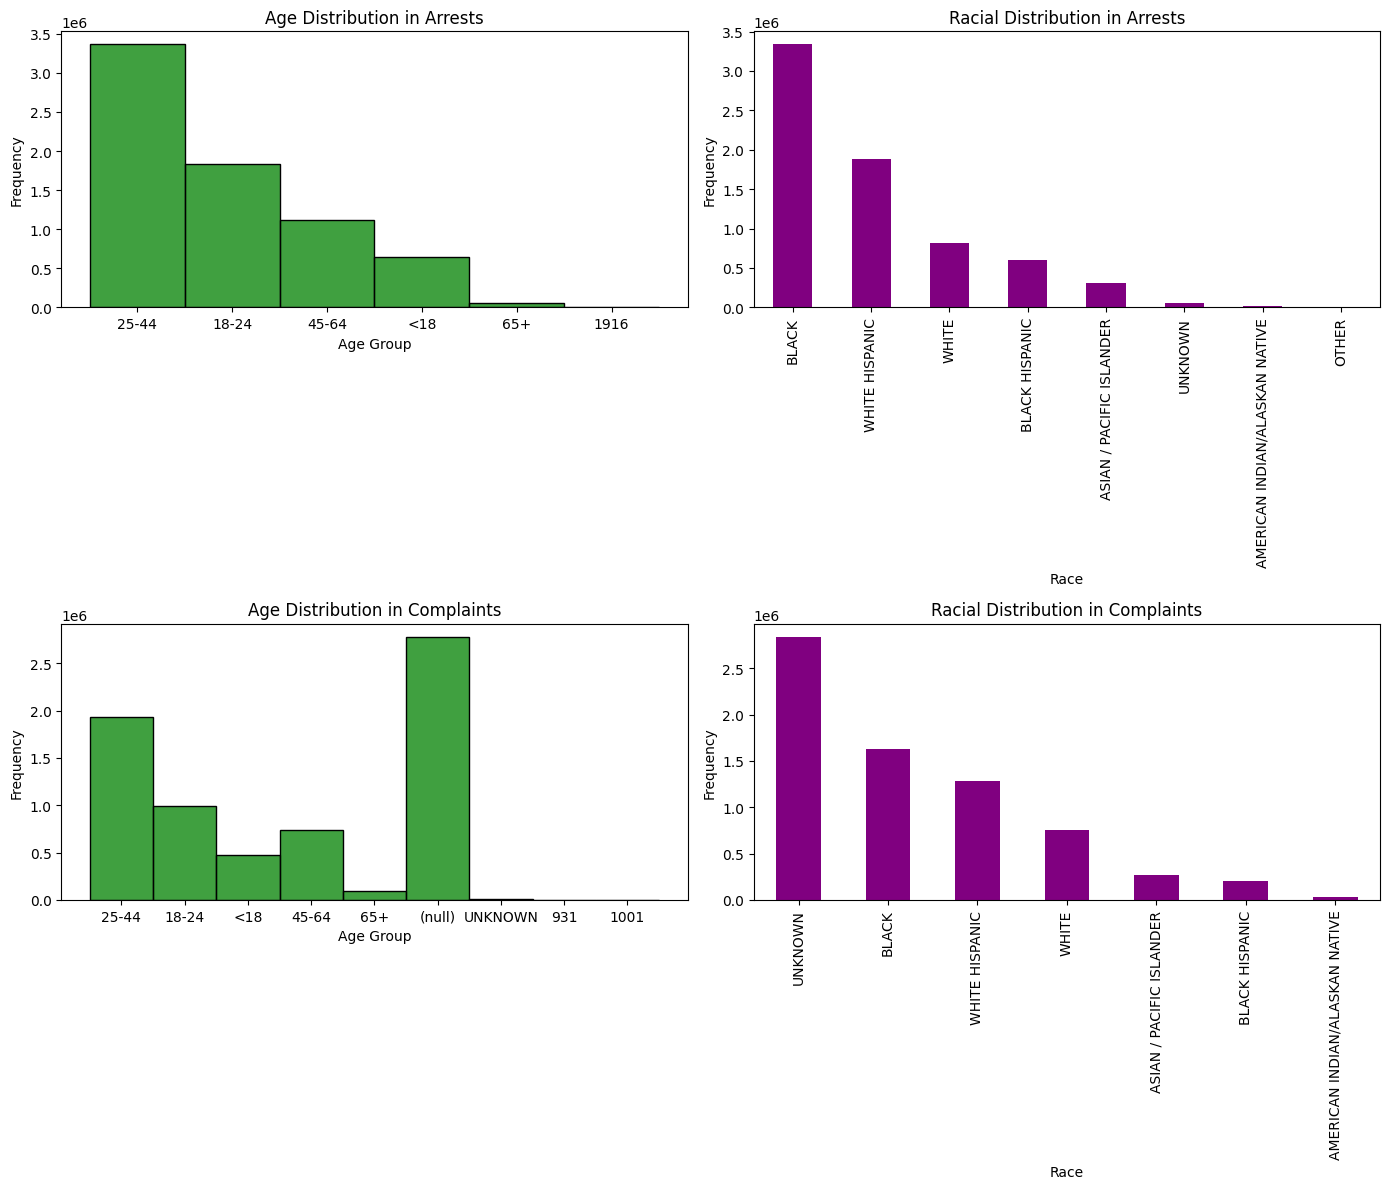

In [23]:
import seaborn as sns

# Create a DataFrame with the data used for plotting
data = {
    'Age Group in Arrests': merged_data['age_group'].value_counts(),
    'Racial Distribution in Arrests': merged_data['perp_race'].value_counts(),
    'Age Group in Complaints': merged_data['vic_age_group'].value_counts(),
    'Racial Distribution in Complaints': merged_data['vic_race'].value_counts()
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file with column headers
df.to_csv('demographic_analysis.csv', index_label='Category')
# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Analyzing age distribution in arrests
sns.histplot(merged_data['age_group'], kde=False, color='green', ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution in Arrests')
axs[0, 0].set_xlabel('Age Group')
axs[0, 0].set_ylabel('Frequency')

# Analyzing racial distribution in arrests
merged_data['perp_race'].value_counts().plot(kind='bar', color='purple', ax=axs[0, 1])
axs[0, 1].set_title('Racial Distribution in Arrests')
axs[0, 1].set_xlabel('Race')
axs[0, 1].set_ylabel('Frequency')

# Analyzing age distribution in complaints
sns.histplot(merged_data['vic_age_group'], kde=False, color='green', ax=axs[1, 0])
axs[1, 0].set_title('Age Distribution in Complaints')
axs[1, 0].set_xlabel('Age Group')
axs[1, 0].set_ylabel('Frequency')

# Analyzing racial distribution in complaints
merged_data['vic_race'].value_counts().plot(kind='bar', color='purple', ax=axs[1, 1])
axs[1, 1].set_title('Racial Distribution in Complaints')
axs[1, 1].set_xlabel('Race')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


The age group with highest number of complaints is 25-44 which can be considered as the middle aged group. Number of highest arrest numbers also belong to the same age group which is not surprising.

Plotted the arrests and complaints according to the race, black and white hispanic are at the top in both arrest numbers and complaints received.

### **Temporal Analysis: Arrests and Complaints by Day of Week**

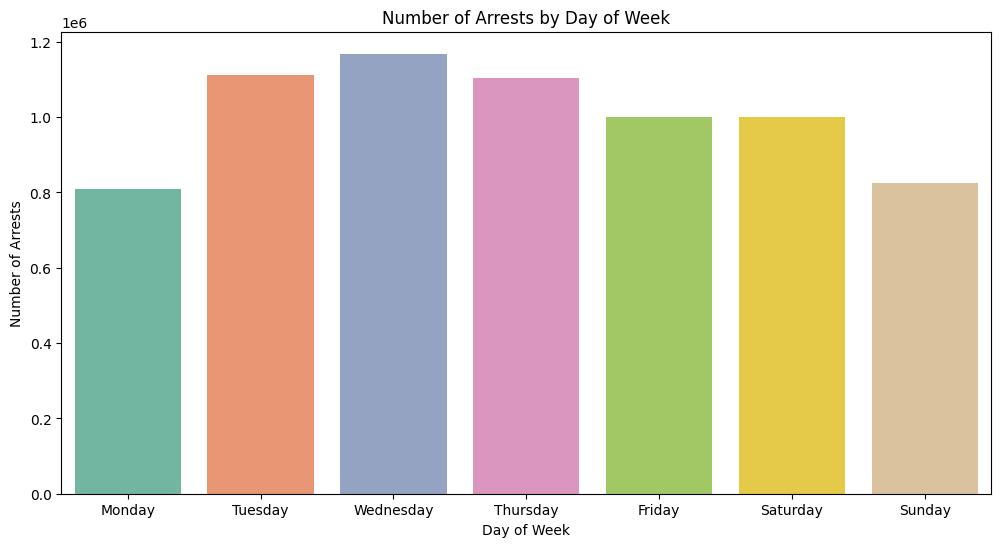

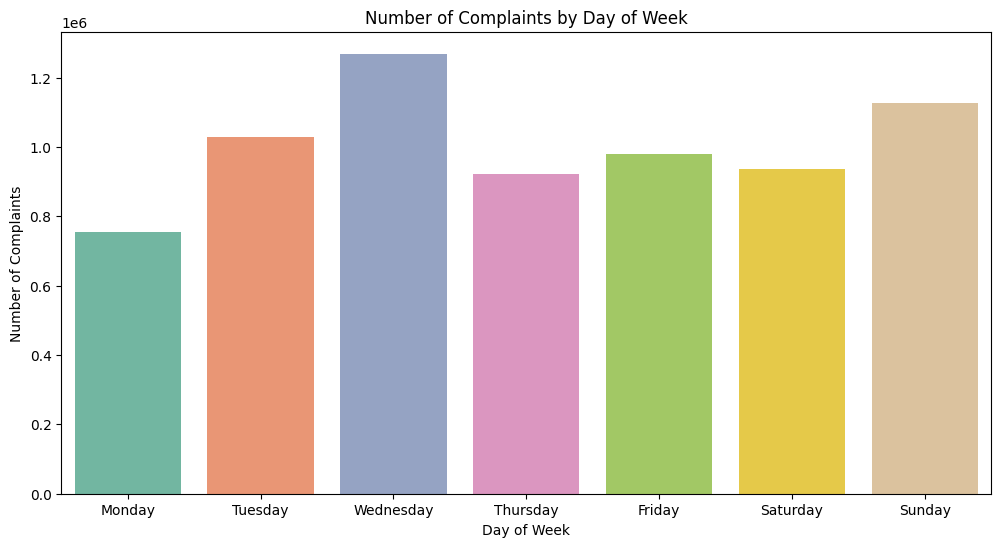

In [24]:
# Convert the arrest date and complaint date to datetime format
merged_data['arrest_date'] = pd.to_datetime(merged_data['arrest_date'])
merged_data['cmplnt_fr_dt'] = pd.to_datetime(merged_data['cmplnt_fr_dt'])

# Extract temporal features: day of week for arrests
merged_data['arrest_day_of_week'] = merged_data['arrest_date'].dt.dayofweek

# Extract temporal features: day of week for complaints
merged_data['complaint_day_of_week'] = merged_data['cmplnt_fr_dt'].dt.dayofweek

# Plotting temporal patterns: arrests by day of week
plt.figure(figsize=(12, 6))
sns.countplot(x='arrest_day_of_week', data=merged_data, hue='arrest_day_of_week', palette='Set2', legend=False)
plt.title('Number of Arrests by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Arrests')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


# Plotting temporal patterns: complaints by day of week
plt.figure(figsize=(12, 6))
sns.countplot(x='complaint_day_of_week', data=merged_data, hue='complaint_day_of_week', palette='Set2', legend=False)
plt.title('Number of Complaints by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Complaints')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

# Save the data to a CSV file
merged_data[['arrest_day_of_week', 'complaint_day_of_week']].to_csv('temporal_patterns.csv', index=False)


Number of arrests on each day of the week is similar to one another with most arrests happening on Wednesday.

Number of complaints are also distributed across the days of the week similar to one another but the highest number of complaints on Saturday, followed by Wednesday.